In [1]:
import pandas as pd
import plotly.express as px
import streamlit as st

Hello, Christopher. My name is Alexander. I'm glad to see you =)

Thank for the link

The ipynb should contain a project with a title, introduction, comments along the way, with a final output. We need to preprocess the data and draw graphs there EDA.ipynb and app.py We need to make primary data preprocessing Please fill in the missing values model_year: group by model fill by median year (don4t drop rows with NaNs in this column) cylindres: group by model fill by median cylindres odometer: group by model year(or year+model) fill by median(mean) odometer As a recommendation - it's better to remove model year and price outliers to make your scatterplots more informative.

## Car Sales Advertisements
The following data includes 13 columns of information on car sales advertisements. First step along the process is to find missing values


In [2]:
df = pd.read_csv('vehicles_us.csv')

In [3]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


From the following data, model_year, cylinders, odometer, paint_color, and is_4wd all contain missing values

In [5]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [16]:
#Fill in median value of column for year and verify 
df['model_year'].fillna(df['model_year'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  brand         51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


In [18]:
#cylindres: group by model fill by median cylindres odometer:
df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'), inplace=True)
#Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  brand         51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


In [27]:
#group by model year(or year+model) fill by median(mean) odometer
df['odometer'].fillna(df.groupby('model')['odometer'].transform('median'), inplace=True)
#Verify info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  brand         51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [8]:
#Grab first word split by space
df['brand'] = df['model'].str.split(' ').str[0]

In [9]:
df['brand'].unique()

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

Remove model year and price outliers to make your scatterplots more informative.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50325 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50325 non-null  int64  
 1   model_year    50325 non-null  float64
 2   model         50325 non-null  object 
 3   condition     50325 non-null  object 
 4   cylinders     50325 non-null  float64
 5   fuel          50325 non-null  object 
 6   odometer      50325 non-null  float64
 7   transmission  50325 non-null  object 
 8   type          50325 non-null  object 
 9   paint_color   41284 non-null  object 
 10  is_4wd        25121 non-null  float64
 11  date_posted   50325 non-null  object 
 12  days_listed   50325 non-null  int64  
 13  brand         50325 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.8+ MB


In [32]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [34]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['model_year'].quantile(0.25)
Q3 = df['model_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['model_year'] >= lower_bound) & (df['model_year'] <= upper_bound)]

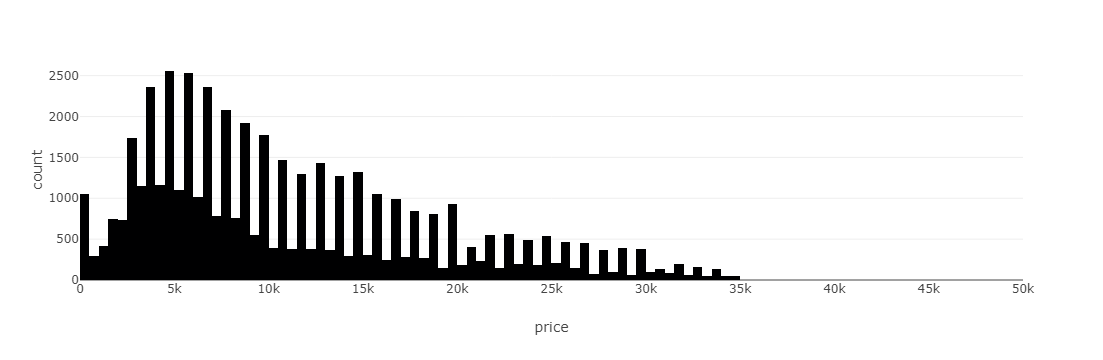

In [41]:
# Create a histogram using Plotly Express
fig = px.histogram(df, x='price')
#range, start point, increment amount as parameters
fig.update_layout(xaxis=dict(range=[0, 50000], tick0=0, dtick=5000))
# Show the plot
fig.show()

In [11]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [12]:
df['price'].median()

9000.0

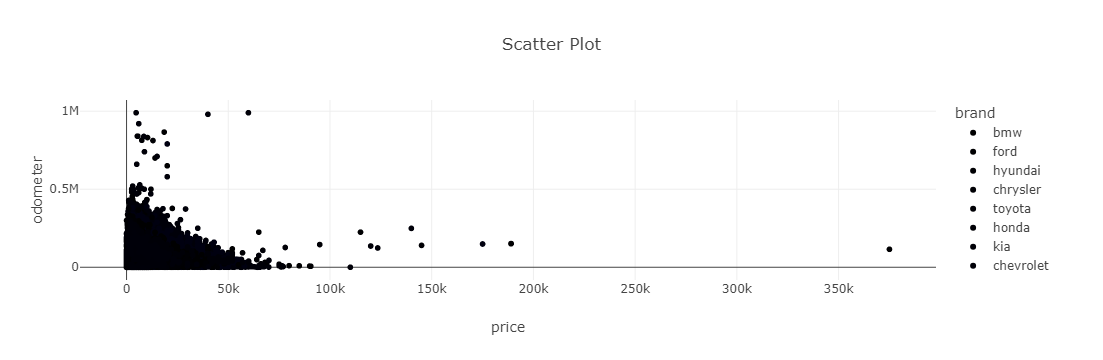

In [13]:

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='price', y='odometer', color='brand', title='Scatter Plot')

# Show the plot
fig.show()

In [14]:
st.header("Exploring Dataset with Streamlit")

2024-04-24 14:05:47.324 
  command:

    streamlit run C:\Users\cboyd\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()